In [5]:
from scripts import Diatom

In [6]:
diatom = Diatom("iLB1027_lipid.xml", "DM")
diatom.set_objective_functions()


'R_AAL(fum)_c' is not a valid SBML 'SId'.
'R_sink_Asn-X-Ser_Thr_c' is not a valid SBML 'SId'.


In [ ]:
def polytope_pipeline(reactions: tuple[str, str], n_angles: int = 360, delta: float = 0.01):
    diatom.analyze.project_polytope_2d(reactions, n_angles = n_angles)
    diatom.grid.sample_polytope(delta = delta)
    diatom.grid.debug_plot(delta = delta)
    diatom.analyze.qualitative_analysis()
    diatom.clustering.set_grid_clusters('hierarchical', k = 20)
    #df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing= True)
    #diatom.clustering.compare_clusters(df, reactions[0], reactions[1]).head(200)
    diatom.plot.plot_sampled_polytope(show_boundary=True)


def analyze_reactions(reaction_list1: list[str], reaction_list2: list[str], n_angles: int = 360, delta: float = 0.05) -> None:
    for reaction1 in reaction_list1:
        for reaction2 in reaction_list2:
            polytope_pipeline((reaction1, reaction2), n_angles = n_angles, delta = delta)


/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


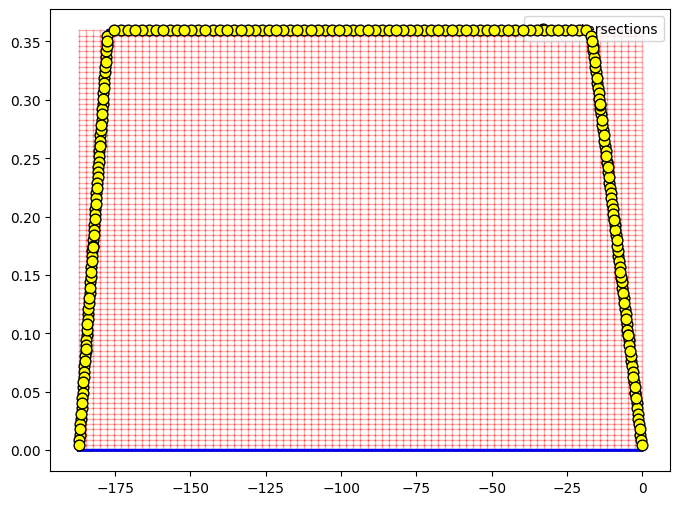

Running qualitative fva over grid feasible points...
No reactions previously selected for FVA and clustering!
Setting reactions for analysis...

Analyzing point feasibility....


100%|██████████| 6254/6254 [00:07<00:00, 884.27it/s]


Done!

base: (6254, 3988) -> one-hot: (6254, 8594)
Clustering grid points ...
Done! n_clusters: 20


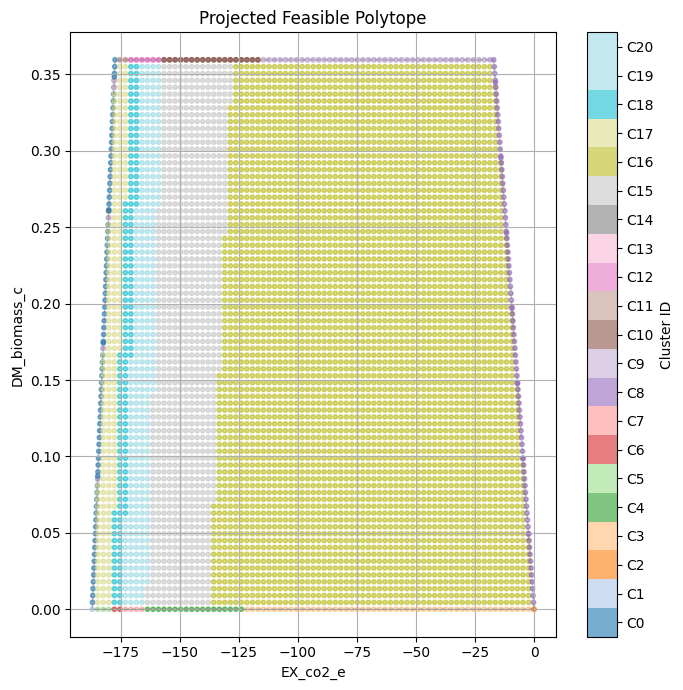

In [8]:
reactions1 = ["EX_co2_e"]
reactions2 = ["DM_biomass_c"]

analyze_reactions(reactions1, reactions2)
